In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [6]:



# CIFAR_10 is a set of 60k images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

# constant
BATCH_SIZE = 128
EPOCHS = 20
CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = tf.keras.optimizers.RMSprop()

# Define the convolutional neural network
def build(input_shape, classes):
  model = models.Sequential()
  model.add(layers.Convolution2D(32, (3,3), activation='relu',
                                input_shape=input_shape))
  model.add(layers.MaxPooling2D(pool_size=(2,2)))
  model.add(layers.Dropout(0.25))

  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(classes, activation='softmax'))
  return model


# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
# convert to categorical
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, CLASSES)

model=build((IMG_ROWS,IMG_COLS,IMG_CHANNELS), CLASSES)
model.summary()

# use TensorBoard princess Aurora!
callbacks = [
    # Write TensorBoard logs to '.logs' directory
    tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

#train
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIM,
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=VALIDATION_SPLIT,
          verbose=VERBOSE)



#evaluate

# CIFAR-10 https://www.cs.toronto.edu/~kriz/cifar.html
# 60,000 32x32 colour images in 10 classes, with 6000 images per class.
# 50000 training, 10000 test
# test batch contains 1000 randomly selected images from each class
# classes are mutally exclusive. No overlap between automobiles and tricks

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       3,686,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,692,938 (14.09 MB)

 Trainable params: 3,692,938 (14.09 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 62s 196ms/step - accuracy: 0.1304 - loss: 51.4887 - val_accuracy: 0.3649 - val_loss: 1.7769
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 87s 211ms/step - accuracy: 0.3558 - loss: 1.8990 - val_accuracy: 0.4483 - val_loss: 1.5572
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 78s 199ms/step - accuracy: 0.4320 - loss: 1.6938 - val_accuracy: 0.4861 - val_loss: 1.4765
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 202ms/step - accuracy: 0.4737 - loss: 1.5833 - val_accuracy: 0.4827 - val_loss: 1.5060
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 202ms/step - accuracy: 0.4919 - loss: 1.5427 - val_accuracy: 0.3669 - val_loss: 1.8146
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 204ms/step - accuracy: 0.5146 - loss: 1.4982 - val_accuracy: 0.5228 - val_loss: 1.5331
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 201ms/step - accuracy: 0.5406 - loss: 1.4313 - val_accuracy: 0.5486 - val_loss: 1.3826
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 79s 193ms/step - accuracy: 0.5547 - loss: 

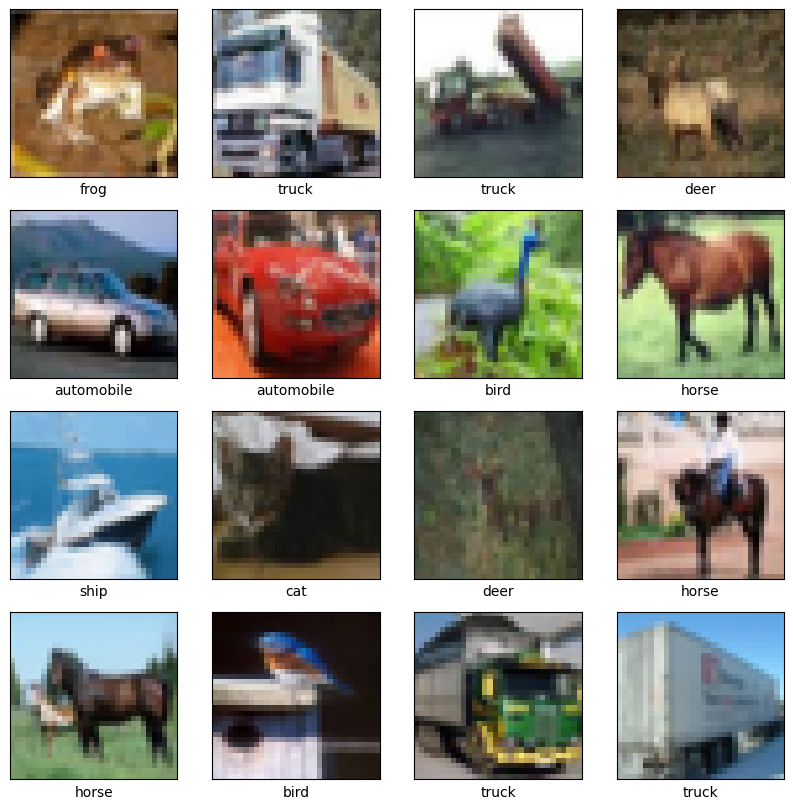

In [7]:
# class names from CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#Simple plot of first 16 images
def plot_sample_images(X_train, y_train):
    plt.figure(figsize=(10, 10))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_train[i])
        plt.xlabel(class_names[np.argmax(y_train[i])])
    plt.show()

plot_sample_images(X_train, y_train)

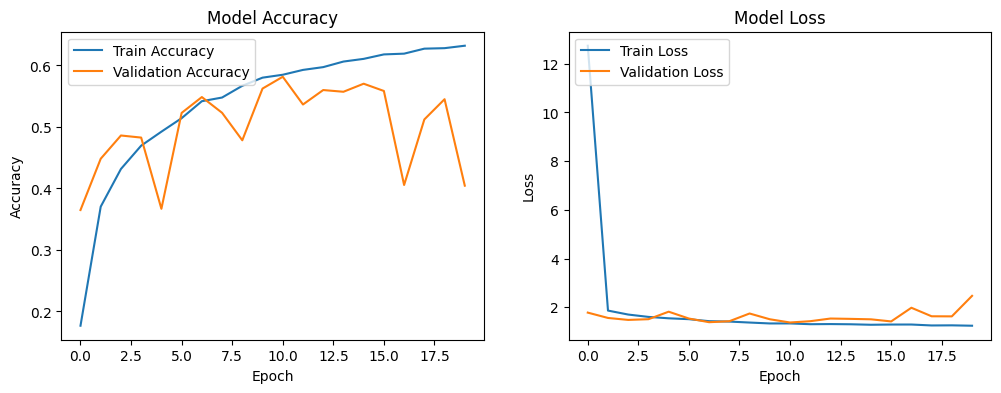

In [8]:
# Pplot accuracy and loss of model
def plot_accuracy_and_loss(history):
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.show()

# Call function
plot_accuracy_and_loss(history)